# 1. Setup

## 1.1 Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.4.1


## 1.2 Import Dependencies

In [1]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU Growth

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [5]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
#Make the directories
"""os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)"""

'os.makedirs(POS_PATH)\nos.makedirs(NEG_PATH)\nos.makedirs(ANC_PATH)'

In [7]:


# Check if the directories are populated
print("Anchor files:", os.listdir(ANC_PATH))  # Should show list of images in the anchor directory
print("Positive files:", os.listdir(POS_PATH))  # Should show list of images in the positive directory
print("Negative files:", os.listdir(NEG_PATH))  # Should show list of images in the negative directory


Anchor files: ['02ef2c8f-121c-11f0-a463-86574533a6dc.jpg', '081a4890-121c-11f0-a298-86574533a6dc.jpg', '08888f91-121f-11f0-916a-86574533a6dc.jpg', '08fd6b62-121c-11f0-a198-86574533a6dc.jpg', '0c64ae7f-121c-11f0-b03a-86574533a6dc.jpg', '109fdd1c-121f-11f0-bf35-86574533a6dc.jpg', '10fa2d11-121c-11f0-96c2-86574533a6dc.jpg', '15bcbb97-121c-11f0-b465-86574533a6dc.jpg', '1f119461-121c-11f0-a7d3-86574533a6dc.jpg', '208ee69e-121c-11f0-8bb7-86574533a6dc.jpg', '22eaeae4-121f-11f0-a039-86574533a6dc.jpg', '253e5626-121f-11f0-90ed-86574533a6dc.jpg', '2a6ae3b1-121c-11f0-9cde-86574533a6dc.jpg', '31f3580a-121f-11f0-964f-86574533a6dc.jpg', '3df042d9-121f-11f0-b36f-86574533a6dc.jpg', '3e338127-121f-11f0-a9c0-86574533a6dc.jpg', '3e4ee4b9-121f-11f0-8c0c-86574533a6dc.jpg', '3e8b752f-121f-11f0-ad11-86574533a6dc.jpg', '3edde8be-121f-11f0-baf0-86574533a6dc.jpg', '3ef3d8a0-121f-11f0-8708-86574533a6dc.jpg', '3f0f7d23-121f-11f0-b106-86574533a6dc.jpg', '403c93dc-121f-11f0-b110-86574533a6dc.jpg', '405e516b-121f-11

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [8]:
# http://vis-www.cs.umass.edu/lfw/

In [9]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
#!tar -xf lfw.tgz

In [10]:
#Move LFW Images to the following repository data/negative
"""
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)"""

"\nfor directory in os.listdir('lfw'):\n    for file in os.listdir(os.path.join('lfw', directory)):\n        EX_PATH = os.path.join('lfw', directory, file)\n        NEW_PATH = os.path.join(NEG_PATH, file)\n        os.replace(EX_PATH, NEW_PATH)"

## 2.2 Collect Positive and Anchor Classes

In [11]:
# Import uuid library to generate unique image names
import uuid

In [12]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\f682d012-21f9-11f0-a3df-ce508f1bbf6f.jpg'

In [4]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

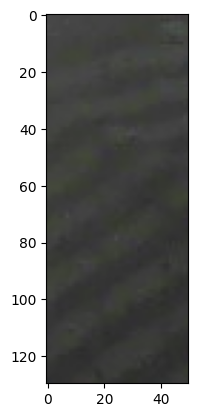

In [14]:
plt.imshow(frame[120:120+250,200:200+250, :])

# 3. Load and Preprocess Images

## 3.1 Get Image Directories


In [15]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
C:\Users\pepar\AppData\Local\Temp\ipykernel_17144\129719944.py:1: SyntaxWarning: invalid escape sequence '\*'
  anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
C:\Users\pepar\AppData\Local\Temp\ipykernel_17144\129719944.py:2: SyntaxWarning: invalid escape sequence '\*'
  positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
C:\Users\pepar\AppData\Local\Temp\ipykernel_17144\129719944.py:3: SyntaxWarning: invalid escape sequence '\*'
  negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)


In [16]:
dir_test = anchor.as_numpy_iterator()

In [17]:
print(dir_test.next())

b'data\\anchor\\a3c19208-121f-11f0-8575-86574533a6dc.jpg'


## 3.2 Preprocessing - Scale and Resize

In [18]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [19]:
img = preprocess('data\\anchor\\59b19f45-121f-11f0-bff7-86574533a6dc.jpg')

In [20]:
img.numpy().max() 

1.0

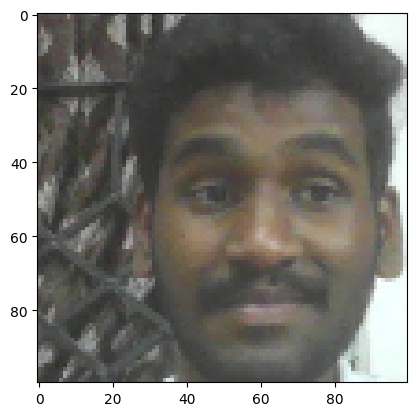

In [21]:
plt.imshow(img)

## 3.3 Create Labelled Dataset

In [22]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [23]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [24]:
samples = data.as_numpy_iterator()

In [25]:
exampple = samples.next()

In [26]:
exampple

(b'data\\anchor\\498b645d-121f-11f0-8a54-86574533a6dc.jpg',
 b'data\\positive\\f4d39f3f-121f-11f0-b548-86574533a6dc.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [27]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [28]:
res = preprocess_twin(*exampple)

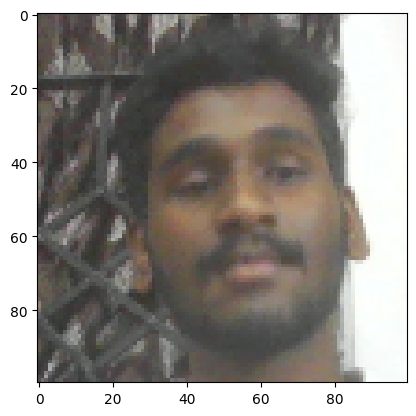

In [29]:
plt.imshow(res[1])

In [30]:
res[2]

1.0

In [31]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [32]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [33]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [34]:
inp = Input(shape=(100,100,3), name='input_image')

In [35]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [36]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [37]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [38]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [39]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [40]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [41]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [43]:
embedding = make_embedding()

In [44]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Build Distance Layer

In [45]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [46]:
l1 = L1Dist()

## 4.3 Make Siamese Model

In [47]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [48]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [49]:
siamese_layer = L1Dist()

In [50]:
inp_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_18>]

In [51]:
# Check if these are lists — if so, fix like this:
inp_embedding = inp_embedding[0] if isinstance(inp_embedding, list) else inp_embedding
val_embedding = val_embedding[0] if isinstance(val_embedding, list) else val_embedding

# Now call the layer
siamese_layer(inp_embedding, val_embedding)



<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_20>

In [52]:
print(type(inp_embedding), type(val_embedding))


<class 'keras.src.backend.common.keras_tensor.KerasTensor'> <class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [53]:
val_embedding

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_19>

In [54]:
distances = L1Dist()(inp_embedding, val_embedding)


In [55]:
classifier = Dense(1, activation='sigmoid')(distances)

In [56]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_22>

In [57]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [58]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten, Embedding
import tensorflow as tf

# Define the L1Dist class
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

# Define the Siamese network architecture
def make_siamese_model():
    # Define the input layers
    input_image = Input(shape=(100, 100, 3), name="input_image")  # Adjust shape as needed
    validation_image = Input(shape=(100, 100, 3), name="validation_image")  # Adjust shape as needed

    # Example of embedding layers for both inputs
    embedding = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu')
    ])

    # Pass inputs through embedding layers
    input_embedding = embedding(input_image)
    validation_embedding = embedding(validation_image)

    # Create the Siamese layer (distance)
    siamese_layer = L1Dist()
    
    # Pass the embeddings through the Siamese layer
    distances = siamese_layer(input_embedding, validation_embedding)  # No list wrapping here

    # Add the classification layer (based on distance)
    classifier = Dense(1, activation='sigmoid')(distances)

    # Create the model
    siamese_model = Model(inputs=[input_image, validation_image], outputs=classifier)
    
    return siamese_model

# Now create the Siamese model
siamese_model = make_siamese_model()

# Check the model summary
siamese_model.summary()


In [ ]:
siamese_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 4096)      │ 629,413,6… │ input_image[0][0… │
│ (Sequential)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_3 (L1Dist)  │ (None, 4096)      │          0 │ sequential[0][0], │
│                     │                   │            │ sequential[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 629,417,729 (2.34 GB)

 Trainable params: 629,417,729 (2.34 GB)

 Non-trainable params: 0 (0.00 B)

# 5. Training

## 5.1 Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

NameError: name 'tf' is not defined

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

NameError: name 'os' is not defined

## 5.3 Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()

NameError: name 'train_data' is not defined

In [ ]:
batch_1 = test_batch.next()

NameError: name 'test_batch' is not defined

In [ ]:
X = batch_1[:2]

In [ ]:
y = batch_1[2]

In [ ]:
y

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

In [ ]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

## 5.4 Build Training Loop

Chat GPT


In [ ]:
#previous 
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
IMG_SIZE = 96  # Reduce from 224 or 160 to 96

def preprocess_image(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(byte_img)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img


In [ ]:
def make_pairs(anchor_paths, positive_paths, negative_paths):
    # Zip anchor and positive images together
    positive_pairs = tf.data.Dataset.from_tensor_slices((anchor_paths, positive_paths))
    positive_labels = tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_paths)))

    # Zip anchor and negative images
    negative_pairs = tf.data.Dataset.from_tensor_slices((anchor_paths, negative_paths))
    negative_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_paths)))

    # Combine both
    pairs = positive_pairs.concatenate(negative_pairs)
    labels = positive_labels.concatenate(negative_labels)

    # Preprocess and zip
    dataset = tf.data.Dataset.zip(((pairs.map(preprocess_image_pair)), labels))
    return dataset

def preprocess_image_pair(anchor_path, compare_path):
    return preprocess_image(anchor_path), preprocess_image(compare_path)


In [ ]:
def make_embedding_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        pooling='avg',
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze for now

    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    return tf.keras.Model(inputs, x)

def make_siamese_model():
    input_a = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    input_b = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    embed_model = make_embedding_model()

    emb_a = embed_model(input_a)
    emb_b = embed_model(input_b)

    distance = tf.keras.layers.Lambda(lambda x: tf.abs(x[0] - x[1]))([emb_a, emb_b])
    output = tf.keras.layers.Dense(1, activation='sigmoid')(distance)

    return tf.keras.Model(inputs=[input_a, input_b], outputs=output)

siamese_model = make_siamese_model()


In [ ]:
import os
import tensorflow as tf

# Correct the paths to handle backslashes properly using raw strings
ANC_PATH = r"D:\FaceRecognition-main\data\anchor"
POS_PATH = r"D:\FaceRecognition-main\data\positive"
NEG_PATH = r"D:\FaceRecognition-main\data\negative"

# Make sure the directories exist
os.makedirs(ANC_PATH, exist_ok=True)
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)

# Example of checking files in the directories
print("Anchor files:", os.listdir(ANC_PATH))  # Should show list of image files
print("Positive files:", os.listdir(POS_PATH))  # Should show list of image files
print("Negative files:", os.listdir(NEG_PATH))  # Should show list of image files

# Now, list files in the 'anchor' folder using tf.data
anchor_files = tf.data.Dataset.list_files(ANC_PATH + r'\*.jpg', shuffle=False).take(5)
for file in anchor_files:
    print(file.numpy().decode('utf-8'))  # This will print out the first 5 file paths


Anchor files: ['02ef2c8f-121c-11f0-a463-86574533a6dc.jpg', '081a4890-121c-11f0-a298-86574533a6dc.jpg', '08888f91-121f-11f0-916a-86574533a6dc.jpg', '08fd6b62-121c-11f0-a198-86574533a6dc.jpg', '0c64ae7f-121c-11f0-b03a-86574533a6dc.jpg', '109fdd1c-121f-11f0-bf35-86574533a6dc.jpg', '10fa2d11-121c-11f0-96c2-86574533a6dc.jpg', '15bcbb97-121c-11f0-b465-86574533a6dc.jpg', '1f119461-121c-11f0-a7d3-86574533a6dc.jpg', '208ee69e-121c-11f0-8bb7-86574533a6dc.jpg', '22eaeae4-121f-11f0-a039-86574533a6dc.jpg', '253e5626-121f-11f0-90ed-86574533a6dc.jpg', '2a6ae3b1-121c-11f0-9cde-86574533a6dc.jpg', '31f3580a-121f-11f0-964f-86574533a6dc.jpg', '3df042d9-121f-11f0-b36f-86574533a6dc.jpg', '3e338127-121f-11f0-a9c0-86574533a6dc.jpg', '3e4ee4b9-121f-11f0-8c0c-86574533a6dc.jpg', '3e8b752f-121f-11f0-ad11-86574533a6dc.jpg', '3edde8be-121f-11f0-baf0-86574533a6dc.jpg', '3ef3d8a0-121f-11f0-8708-86574533a6dc.jpg', '3f0f7d23-121f-11f0-b106-86574533a6dc.jpg', '403c93dc-121f-11f0-b110-86574533a6dc.jpg', '405e516b-121f-11

## 5.5 Train the model

In [ ]:
EPOCHS = 20

In [ ]:
embedding = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu')  # Reduced number of neurons
])


In [ ]:
import tensorflow as tf
import os

# Set image size and paths
IMG_SIZE = 96
ANC_PATH = r"D:\FaceRecognition-main\data\anchor"
POS_PATH = r"D:\FaceRecognition-main\data\positive"
NEG_PATH = r"D:\FaceRecognition-main\data\negative"

# Make sure directories exist
os.makedirs(ANC_PATH, exist_ok=True)
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)

# Preprocessing function for a single image
def preprocess_image(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(byte_img)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img

# Create pairs for training
def make_pairs(anchor_paths, positive_paths, negative_paths):
    # Convert datasets to lists of paths
    anchor_paths = list(anchor_paths)
    positive_paths = list(positive_paths)
    negative_paths = list(negative_paths)

    # Zip anchor and positive images together
    positive_pairs = tf.data.Dataset.from_tensor_slices((anchor_paths, positive_paths))
    positive_labels = tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_paths)))

    # Zip anchor and negative images
    negative_pairs = tf.data.Dataset.from_tensor_slices((anchor_paths, negative_paths))
    negative_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_paths)))

    # Combine both positive and negative pairs
    pairs = positive_pairs.concatenate(negative_pairs)
    labels = positive_labels.concatenate(negative_labels)

    # Preprocess and combine pairs with labels
    dataset = tf.data.Dataset.zip(((pairs.map(preprocess_image_pair)), labels))
    return dataset

def preprocess_image_pair(anchor_path, compare_path):
    return preprocess_image(anchor_path), preprocess_image(compare_path)

# Create the embedding model using MobileNetV2
def make_embedding_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        pooling='avg',
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the base model

    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    return tf.keras.Model(inputs, x)

# Create the Siamese model
def make_siamese_model():
    input_a = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    input_b = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    embed_model = make_embedding_model()

    emb_a = embed_model(input_a)
    emb_b = embed_model(input_b)

    distance = tf.keras.layers.Lambda(lambda x: tf.abs(x[0] - x[1]))([emb_a, emb_b])
    output = tf.keras.layers.Dense(1, activation='sigmoid')(distance)

    return tf.keras.Model(inputs=[input_a, input_b], outputs=output)

# Initialize the Siamese model
siamese_model = make_siamese_model()

# Define optimizer
optimizer = tf.keras.optimizers.Adam()

# Define checkpoint for saving the model
checkpoint = tf.train.Checkpoint(model=siamese_model, optimizer=optimizer)
checkpoint_prefix = "path_to_save_checkpoints/siamese_model"

# Train step function
@tf.function
def train_step(batch):
    # Unpack the batch (anchor, positive, label)
    (anchor, positive), label = batch

    with tf.GradientTape() as tape:
        # Forward pass for anchor and positive pairs
        predictions = siamese_model([anchor, positive], training=True)

        # Compute loss (binary cross-entropy)
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(label, predictions)

    # Compute gradients
    gradients = tape.gradient(loss, siamese_model.trainable_variables)

    # Apply gradients using the optimizer
    optimizer.apply_gradients(zip(gradients, siamese_model.trainable_variables))

    return loss

# Training function
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS + 1):
        print('\nEpoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(data):
            loss = train_step(batch)
            progbar.update(idx + 1)

        # Save checkpoints every 10 epochs
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            print(f"Checkpoint saved at epoch {epoch}, loss: {loss.numpy()}")

# List files in directories and prepare dataset
anchor_files = tf.data.Dataset.list_files(ANC_PATH + r'/*.jpg', shuffle=False)
positive_files = tf.data.Dataset.list_files(POS_PATH + r'/*.jpg', shuffle=False)
negative_files = tf.data.Dataset.list_files(NEG_PATH + r'/*.jpg', shuffle=False)

# Take first 300 images from each dataset (you can adjust this as needed)
anchor_files = anchor_files.take(300)
positive_files = positive_files.take(300)
negative_files = negative_files.take(300)

# Make pairs and create dataset
train_data = make_pairs(anchor_files, positive_files, negative_files)

# Batch the data
BATCH_SIZE = 8
train_data = train_data.batch(BATCH_SIZE)

# Train the model
EPOCHS = 20
train(train_data, EPOCHS)



Epoch 1/20


c:\Users\pepar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step

Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step

Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step

Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step

Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step

Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step

Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step

Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step

Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step

Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step
Checkpoint saved at epoch 10, loss: 3.0263727239798754e-06

Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step

Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step

Epoch 13/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step

Epoch 14/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step

Epoch 15/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step

Epoch 16/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step

Epoch 17/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step

Epoch 18/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 87m

# 6. Evaluate Model

## 6.1 Import Metrics

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [ ]:
# Get a batch from train_data (or test_data if you have a test set)
(anchor_batch, comparison_batch), label_batch = train_data.as_numpy_iterator().next()


In [ ]:
predictions = siamese_model.predict([anchor_batch, comparison_batch])

c:\Users\pepar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_430', 'keras_tensor_431']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
# Display predictions vs labels
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i][0]:.2f}, Actual: {label_batch[i]}")

Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0
Prediction: 1.00, Actual: 1.0


## 6.3 Calculate Metrics

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(anchor_batch, comparison_batch)

# Return Recall Result
m.result().numpy()

0.24494539

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(anchor_batch, comparison_batch)

# Return Recall Result
m.result().numpy()

1.0

## 6.4 Viz Results

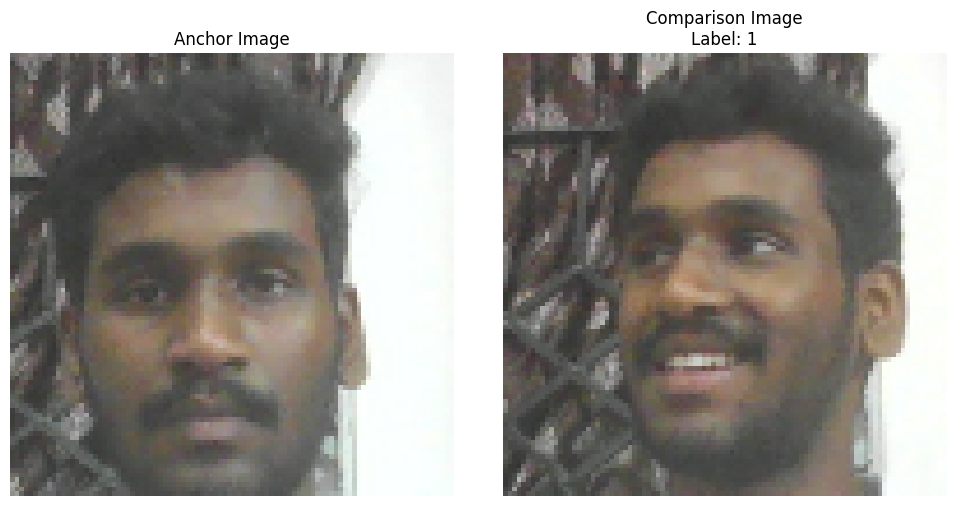

In [ ]:
import matplotlib.pyplot as plt

# Get one batch from the train data
sample_batch = next(iter(train_data))
(image1, image2), label = sample_batch

# Convert tensors to numpy arrays
img1 = image1[0].numpy()
img2 = image2[0].numpy()
lbl = label[0].numpy()

# Set plot size
plt.figure(figsize=(10, 5))

# First image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Anchor Image")
plt.axis('off')

# Second image
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Comparison Image\nLabel: {}".format(int(lbl)))  # 1 = same, 0 = different
plt.axis('off')

plt.tight_layout()
plt.show()


# 7. Save Model

In [ ]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
L1Dist

__main__.L1Dist

In [ ]:
import tensorflow as tf
def make_siamese_model():
    input_a = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    input_b = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    embed_model = make_embedding_model()

    emb_a = embed_model(input_a)
    emb_b = embed_model(input_b)

    # FIX: Define L1 distance Lambda layer with output_shape
    distance = tf.keras.layers.Lambda(
        lambda tensors: tf.abs(tensors[0] - tensors[1]),
        output_shape=(128,)
    )([emb_a, emb_b])

    output = tf.keras.layers.Dense(1, activation='sigmoid')(distance)

    return tf.keras.Model(inputs=[input_a, input_b], outputs=output)


In [ ]:
siamese_model = make_siamese_model()
siamese_model.compile(optimizer='adam', loss='binary_crossentropy')
# Train again if needed
siamese_model.save("siamesemodel_fixed.h5")


In [ ]:
model = tf.keras.models.load_model(
    "siamesemodel_fixed.h5",
    custom_objects={'BinaryCrossentropy': tf.keras.losses.BinaryCrossentropy}
)


In [ ]:

model.predict(train_data)


c:\Users\pepar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_37', 'input_layer_38']. Received: the structure of inputs=('*', '*')
  warnings.warn(


NameError: Exception encountered when calling Lambda.call().

[1mname 'tf' is not defined[0m

Arguments received by Lambda.call():
  • inputs=['tf.Tensor(shape=(8, 128), dtype=float32)', 'tf.Tensor(shape=(8, 128), dtype=float32)']
  • mask=['None', 'None']
  • training=False

In [ ]:
# View model summary
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_38      │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_15       │ (None, 128)       │  2,421,952 │ input_layer_37[0… │
│ (Functional)        │                   │            │ input_layer_38[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 128)       │          0 │ functional_15[0]… │
│                     │                   │            │ functional_15[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │        129 │ lambda_4[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,422,083 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
application_data/verification_images

NameError: name 'application_data' is not defined

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

['000ede6d-1220-11f0-ba9f-86574533a6dc.jpg',
 '00a222d2-1220-11f0-82bc-86574533a6dc.jpg',
 '00d63a4c-1220-11f0-b531-86574533a6dc.jpg',
 '05934400-1220-11f0-a4dd-86574533a6dc.jpg',
 '05eda040-1220-11f0-80a0-86574533a6dc.jpg',
 '06615428-1220-11f0-acb7-86574533a6dc.jpg',
 '06dde4bb-1220-11f0-b72d-86574533a6dc.jpg',
 '081577e9-1220-11f0-9ea3-86574533a6dc.jpg',
 '08972305-1220-11f0-8816-86574533a6dc.jpg',
 '0aafe931-1220-11f0-8287-86574533a6dc.jpg',
 '1071992c-1220-11f0-9897-86574533a6dc.jpg',
 '127263e2-1220-11f0-8d58-86574533a6dc.jpg',
 '174350b7-1220-11f0-b912-86574533a6dc.jpg',
 '18a4bab8-1220-11f0-8507-86574533a6dc.jpg',
 '18fc7c70-1220-11f0-b806-86574533a6dc.jpg',
 '195952c2-1220-11f0-a30b-86574533a6dc.jpg',
 '1c77eace-1220-11f0-91ac-86574533a6dc.jpg',
 '1cef42a3-1220-11f0-ab3a-86574533a6dc.jpg',
 '1d7ddaa7-1220-11f0-bcba-86574533a6dc.jpg',
 '1db857df-1220-11f0-89f3-86574533a6dc.jpg',
 '21d03b0d-1220-11f0-a8f6-86574533a6dc.jpg',
 '228763d3-1220-11f0-be76-86574533a6dc.jpg',
 '23f7ef69

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\000ede6d-1220-11f0-ba9f-86574533a6dc.jpg
application_data\verification_images\00a222d2-1220-11f0-82bc-86574533a6dc.jpg
application_data\verification_images\00d63a4c-1220-11f0-b531-86574533a6dc.jpg
application_data\verification_images\05934400-1220-11f0-a4dd-86574533a6dc.jpg
application_data\verification_images\05eda040-1220-11f0-80a0-86574533a6dc.jpg
application_data\verification_images\06615428-1220-11f0-acb7-86574533a6dc.jpg
application_data\verification_images\06dde4bb-1220-11f0-b72d-86574533a6dc.jpg
application_data\verification_images\081577e9-1220-11f0-9ea3-86574533a6dc.jpg
application_data\verification_images\08972305-1220-11f0-8816-86574533a6dc.jpg
application_data\verification_images\0aafe931-1220-11f0-8287-86574533a6dc.jpg
application_data\verification_images\1071992c-1220-11f0-9897-86574533a6dc.jpg
application_data\verification_images\127263e2-1220-11f0-8d58-86574533a6dc.jpg
application_data\verification_images\174350b7-1220-11f0-b912-865

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined

: 

In [ ]:
np.sum(np.squeeze(results) > 0.9)

NameError: name 'np' is not defined

In [ ]:
32/50

0.64